# Análisis Entrópico

En esta notebook, veremos algunas estadísticas relacionadas a la entropía.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd

df = pd.read_csv("data/cantidades_totales.csv", index_col=0)


In [2]:
import re
from scipy.stats import entropy
cant_palabras = [c for c in df.columns if re.match(r'.*Palabras$', c)]
cant_personas = [c for c in df.columns if re.match(r'.*Usuarios$', c)]

df["cant_provincias"] = (df[cant_palabras] > 0).sum(axis=1)
df["entropy_palabras"] = df[cant_palabras].apply(entropy, axis=1, raw=True)
df["entropy_personas"] = df[cant_personas].apply(entropy, axis=1, raw=True)

## Plot "3d" usuarios, ocurrencias -> entropía

Acá vemos cuáles son las palabras que queremos encontrar: las que están en "rojo", aunque con cierto nivel de uso...

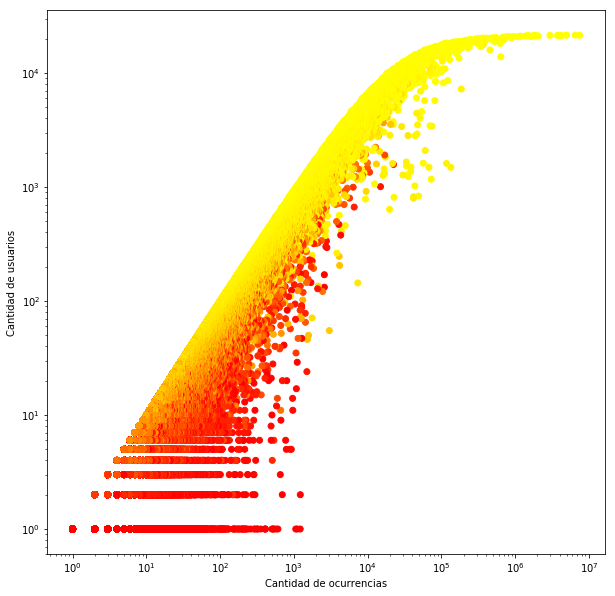

In [3]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)

plt.scatter(df["cantPalabra"], df["cantUsuariosTotal"], 
        c=df["entropy_palabras"], cmap=plt.cm.autumn)
plt.xlabel("Cantidad de ocurrencias")
plt.ylabel("Cantidad de usuarios")
plt.semilogx();
plt.semilogy();

## Cantidad de palabras acumulada según cantidad de usuarios/ocurrencias

[]

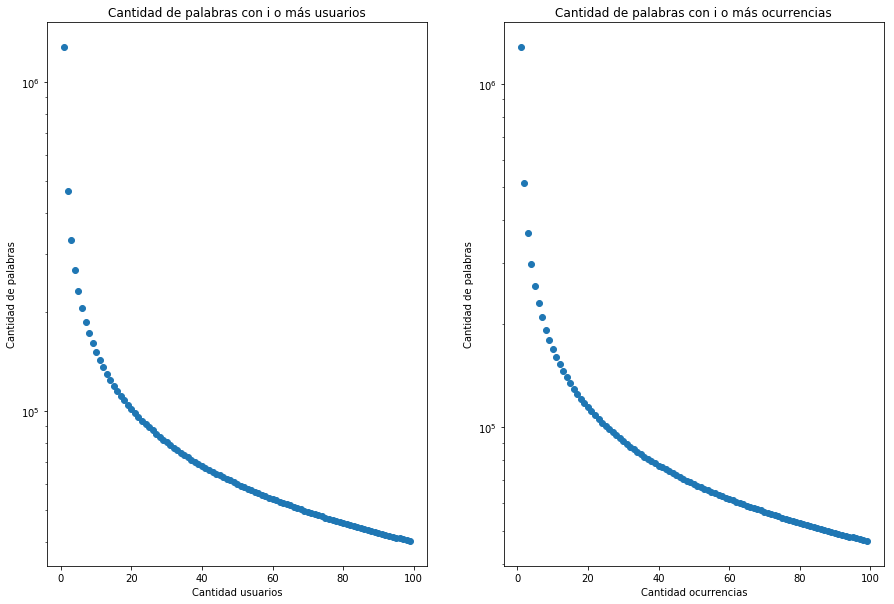

In [4]:
plt.rcParams["figure.figsize"] = (15, 10)
X = []
for i in range(1, 100):
    X.append((df.cantUsuariosTotal >= i).sum())

plt.subplot(1,2,1)
plt.scatter(range(1, 100), X)
plt.title(u"Cantidad de palabras con i o más usuarios")
plt.xlabel("Cantidad usuarios")
plt.ylabel("Cantidad de palabras")

plt.semilogy()

X = []
for i in range(1, 100):
    X.append((df.cantPalabra >= i).sum())
    
plt.subplot(1,2,2)
plt.scatter(range(1, 100), X)
plt.title(u"Cantidad de palabras con i o más ocurrencias")
plt.xlabel("Cantidad ocurrencias")
plt.ylabel("Cantidad de palabras")

plt.semilogy()